# Import necessary libraries

In [3]:
#imports necessary libraries to do basic things on the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess the data
data = pd.read_excel('https://query.data.world/s/46ldgtnufk4lbd7htkgruheneegxhq?dws=00000')

# We Read Dataset

In [4]:
#Reading data
# Load the dataset
data.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


WE DROP UNNWANTED DATA COLUMN

In [5]:
from sklearn.impute import SimpleImputer

data = data.drop(columns=['Code', 'Entity', 'Eating disorders (%)', 'Schizophrenia (%)' ])
data.head()

,Year,Bipolar disorder (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,1990,0.697779,4.828830,1.677082,4.071831,0.672404
1,1991,0.697961,4.829740,1.684746,4.079531,0.671768
2,1992,0.698107,4.831108,1.694334,4.088358,0.670644
3,1993,0.698257,4.830864,1.705320,4.096190,0.669738
4,1994,0.698469,4.829423,1.716069,4.099582,0.669260


# Preprocessing and Cleaning dataset

In [6]:
#Check the dataset for missing data
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

There is no missing data in our dataset


In [7]:
#Check our missing data from which columns and how many unique features they have.
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame

,0,1,2
Year,0,28,int64
Bipolar disorder (%),0,6468,float64
Anxiety disorders (%),0,6468,float64
Drug use disorders (%),0,6468,float64
Depression (%),0,6468,float64
Alcohol use disorders (%),0,6468,float64


In [8]:
#Look at what is in the 'Bipolar disorder (%)' column to choose a suitable method to fill nan values.
data['Bipolar disorder (%)'].unique()

data = pd.DataFrame(data)

data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce') * 100

# Apply formatting only to numeric values with two decimal places
data['Bipolar disorder (%)'] = data['Bipolar disorder (%)'].apply(lambda x: f"{x:.2f}" if not pd.isna(x) else 'Not available')

data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce') * 10

# Apply formatting only to numeric values with two decimal places
data['Depression (%)'] = data['Depression (%)'].apply(lambda x: f"{x:.2f}" if not pd.isna(x) else 'Not available')

# Print the DataFrame with the formatted column
print(data)


      Year Bipolar disorder (%)  Anxiety disorders (%)  \
0     1990                69.78               4.828830   
1     1991                69.80               4.829740   
2     1992                69.81               4.831108   
3     1993                69.83               4.830864   
4     1994                69.85               4.829423   
...    ...                  ...                    ...   
6463  2013                60.80               3.090168   
6464  2014                60.86               3.093964   
6465  2015                60.94               3.098687   
6466  2016                61.02               3.104294   
6467  2017                61.12               3.110926   

      Drug use disorders (%) Depression (%)  Alcohol use disorders (%)  
0                   1.677082          40.72                   0.672404  
1                   1.684746          40.80                   0.671768  
2                   1.694334          40.88                   0.670644  
3          

In [9]:
data['Drug use disorders (%)'] = pd.to_numeric(data['Drug use disorders (%)'], errors='coerce') * 10

# Apply formatting only to numeric values with two decimal places
data['Drug use disorders (%)'] = data['Drug use disorders (%)'].apply(lambda x: f"{x:.2f}" if not pd.isna(x) else 'Not available')

# Print the DataFrame with the formatted column
print(data)

      Year Bipolar disorder (%)  Anxiety disorders (%) Drug use disorders (%)  \
0     1990                69.78               4.828830                  16.77   
1     1991                69.80               4.829740                  16.85   
2     1992                69.81               4.831108                  16.94   
3     1993                69.83               4.830864                  17.05   
4     1994                69.85               4.829423                  17.16   
...    ...                  ...                    ...                    ...   
6463  2013                60.80               3.090168                   7.66   
6464  2014                60.86               3.093964                   7.69   
6465  2015                60.94               3.098687                   7.72   
6466  2016                61.02               3.104294                   7.72   
6467  2017                61.12               3.110926                   7.73   

     Depression (%)  Alcoho

In [10]:
data['Anxiety disorders (%)'] = pd.to_numeric(data['Anxiety disorders (%)'], errors='coerce') * 10

# Apply formatting only to numeric values with two decimal places
data['Anxiety disorders (%)'] = data['Anxiety disorders (%)'].apply(lambda x: f"{x:.2f}" if not pd.isna(x) else 'Not available')

# Print the DataFrame with the formatted column
print(data)

      Year Bipolar disorder (%) Anxiety disorders (%) Drug use disorders (%)  \
0     1990                69.78                 48.29                  16.77   
1     1991                69.80                 48.30                  16.85   
2     1992                69.81                 48.31                  16.94   
3     1993                69.83                 48.31                  17.05   
4     1994                69.85                 48.29                  17.16   
...    ...                  ...                   ...                    ...   
6463  2013                60.80                 30.90                   7.66   
6464  2014                60.86                 30.94                   7.69   
6465  2015                60.94                 30.99                   7.72   
6466  2016                61.02                 31.04                   7.72   
6467  2017                61.12                 31.11                   7.73   

     Depression (%)  Alcohol use disord

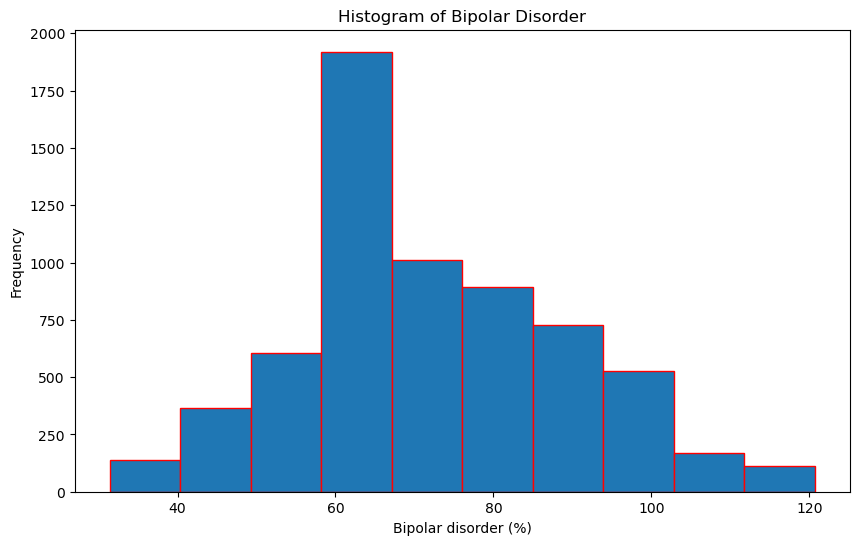

In [11]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Create the histogram using the 'Bipolar disorder (%)' column data
plt.figure(figsize=(10, 6))
plt.hist(data['Bipolar disorder (%)'], bins=10, edgecolor='red')

# Add labels and title
plt.xlabel('Bipolar disorder (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Bipolar Disorder')

# Show the plot
plt.show()


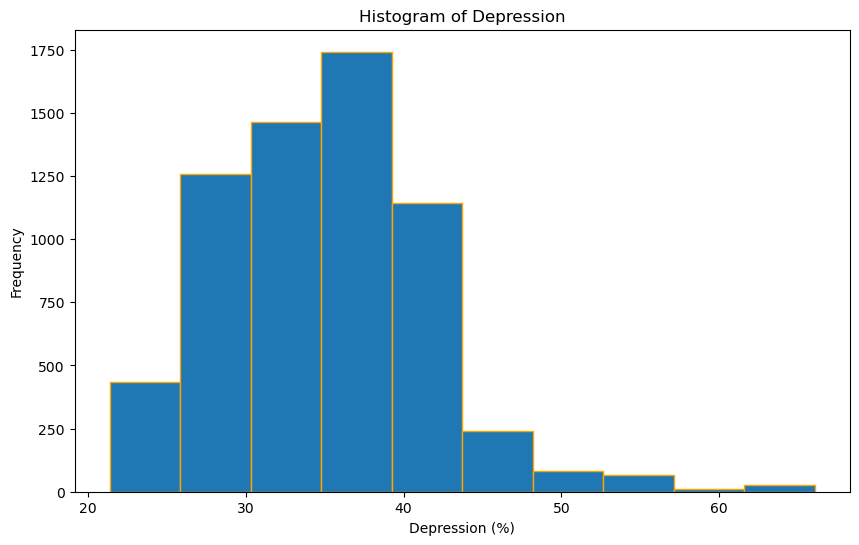

In [12]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce')

# Create the histogram using the 'Bipolar disorder (%)' column data
plt.figure(figsize=(10, 6))
plt.hist(data['Depression (%)'], bins=10, edgecolor='orange')

# Add labels and title
plt.xlabel('Depression (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Depression')

# Show the plot
plt.show()

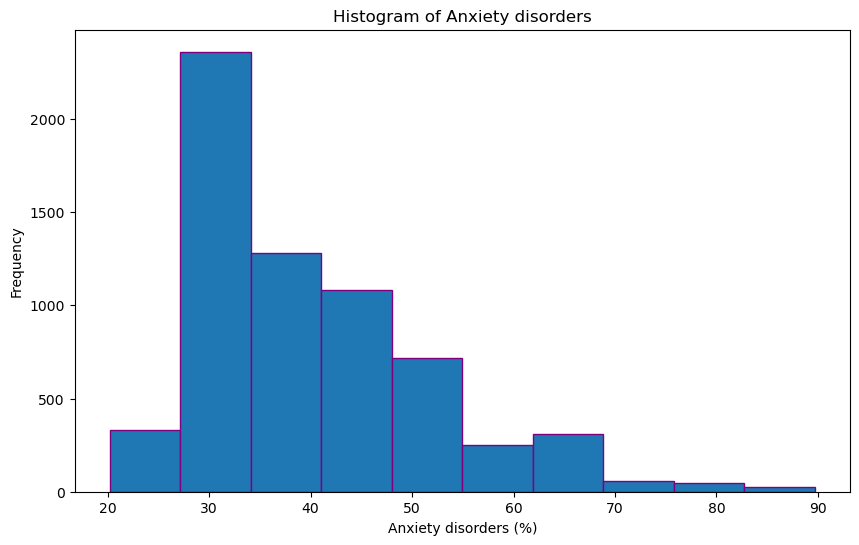

In [13]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Anxiety disorders (%)'] = pd.to_numeric(data['Anxiety disorders (%)'], errors='coerce')

# Create the histogram using the 'Bipolar disorder (%)' column data
plt.figure(figsize=(10, 6))
plt.hist(data['Anxiety disorders (%)'], bins=10, edgecolor='purple')

# Add labels and title
plt.xlabel('Anxiety disorders (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Anxiety disorders')

# Show the plot
plt.show()

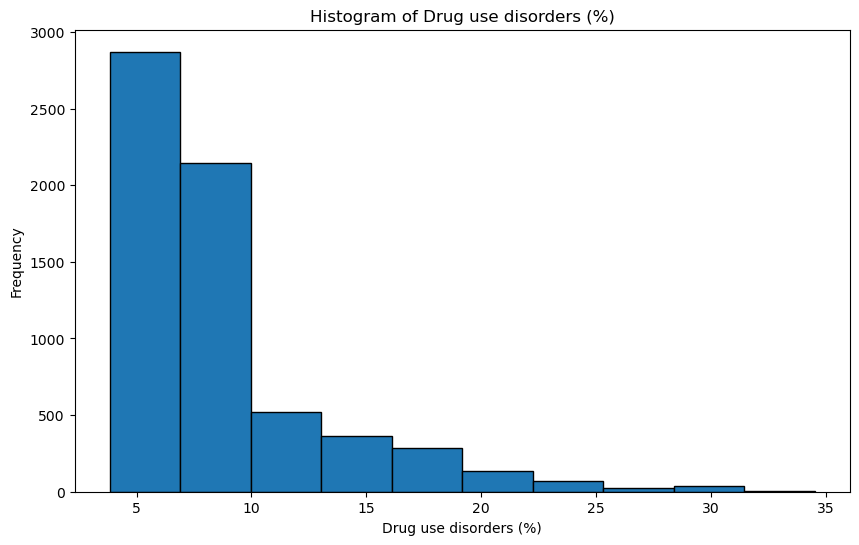

In [14]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Drug use disorders (%)'] = pd.to_numeric(data['Drug use disorders (%)'], errors='coerce')

# Create the histogram using the 'Bipolar disorder (%)' column data
plt.figure(figsize=(10, 6))
plt.hist(data['Drug use disorders (%)'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Drug use disorders (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Drug use disorders (%)')

# Show the plot
plt.show()

In [15]:
#Check unique data in Bipolar disorder columns
print(data['Bipolar disorder (%)'].unique())
print('')
print('-'*75)
print('')

#Check number of unique data IN Depression too.
print(data['Depression (%)'].unique())
print('')
print('-'*75)
print('')

#Check number of unique data IN Drug Use too.
print(data['Drug use disorders (%)'].unique())
print('')
print('-'*75)
print('')

#Check number of unique data IN Anxiety too.
print(data['Anxiety disorders (%)'].unique())
print('')
print('-'*75)
print('')
print('number of unique Bipolar disorder (%) cases in our dataset is :', data['Bipolar disorder (%)'].nunique())
print('number of unique Despression (%) cases in our dataset is :', data['Depression (%)'].nunique())
print('number of unique Drug use disorders (%) cases in our dataset is :', data['Drug use disorders (%)'].nunique())
print('number of unique Anxiety disorders (%) cases in our dataset is :', data['Anxiety disorders (%)'].nunique())

[69.78 69.8  69.81 ... 60.83 60.69 60.86]

---------------------------------------------------------------------------

[40.72 40.8  40.88 ... 34.54 35.29 30.81]

---------------------------------------------------------------------------

[16.77 16.85 16.94 ... 12.   13.43 13.82]

---------------------------------------------------------------------------

[48.29 48.3  48.31 ... 30.84 30.9  31.11]

---------------------------------------------------------------------------

number of unique Bipolar disorder (%) cases in our dataset is : 3581
number of unique Despression (%) cases in our dataset is : 2214
number of unique Drug use disorders (%) cases in our dataset is : 1478
number of unique Anxiety disorders (%) cases in our dataset is : 2328


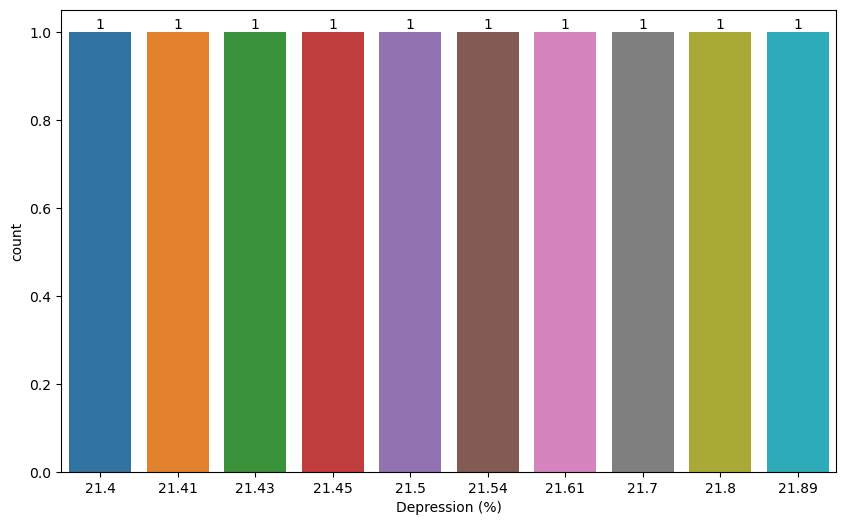

In [16]:
#Plot Depression columns after cleaning and new categorizing
data = pd.DataFrame(data)

# Convert the 'Depression (%)' column to numeric
data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Depression (%)'].sort_values().drop_duplicates().head(10)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[data['Depression (%)'].isin(distinct_data)], x='Depression (%)')
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()


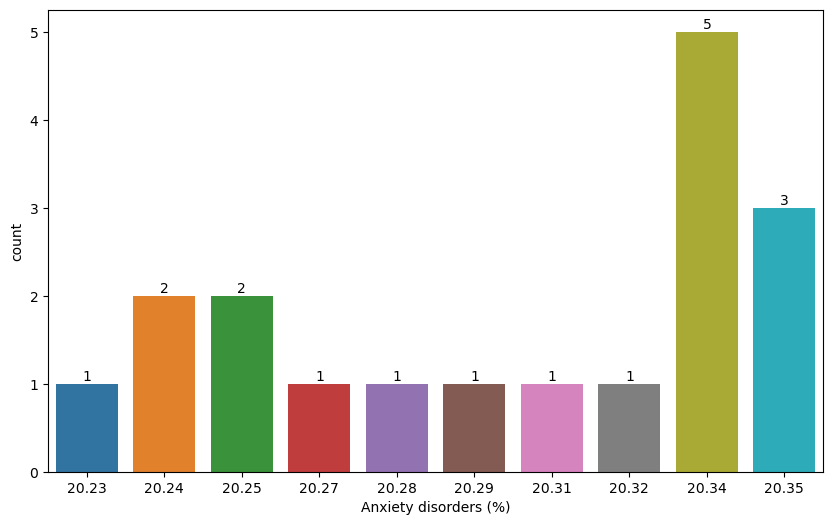

In [17]:
#Plot Anxiety disorders columns after cleaning and new categorizing
data = pd.DataFrame(data)

# Convert the 'Anxiety disorders (%)' column to numeric
data['Anxiety disorders (%)'] = pd.to_numeric(data['Anxiety disorders (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Anxiety disorders (%)'].sort_values().drop_duplicates().head(10)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[data['Anxiety disorders (%)'].isin(distinct_data)], x='Anxiety disorders (%)')
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()

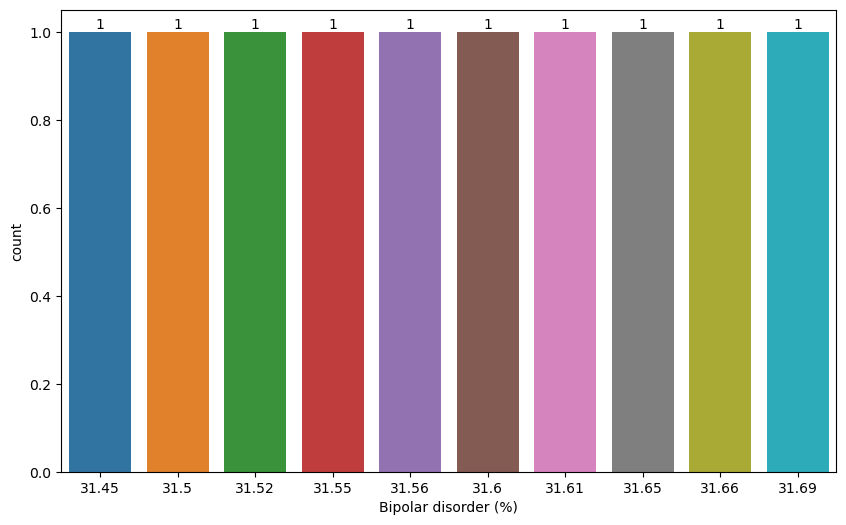

In [18]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Bipolar disorder (%)'].sort_values().drop_duplicates().head(10)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
bx = sns.countplot(data=data[data['Bipolar disorder (%)'].isin(distinct_data)], x='Bipolar disorder (%)')
bx.bar_label(bx.containers[0])

# Show the plot
plt.show()

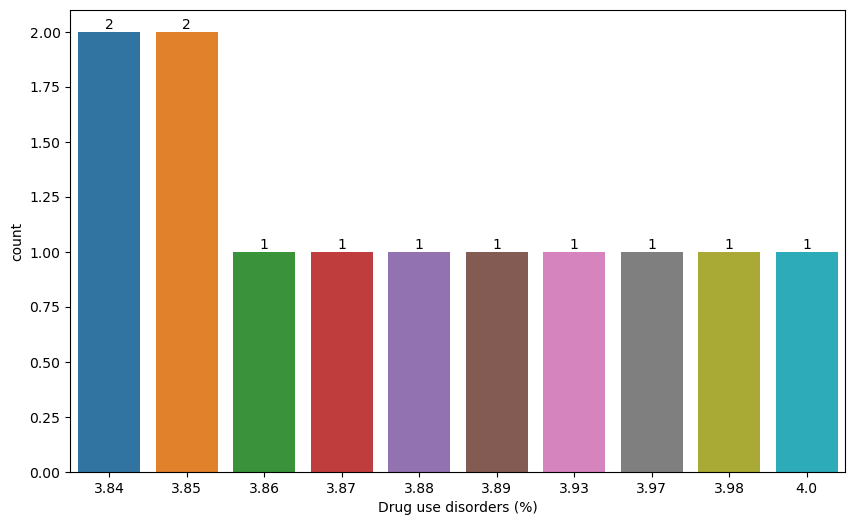

In [19]:
 #Plot Drug use disorders columns after cleaning and new categorizing
data = pd.DataFrame(data)

# Convert the 'Drug use disorders (%)' column to numeric
data['Drug use disorders (%)'] = pd.to_numeric(data['Drug use disorders (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Drug use disorders (%)'].sort_values().drop_duplicates().head(10)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[data['Drug use disorders (%)'].isin(distinct_data)], x='Drug use disorders (%)')
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()

In [20]:
#Our data is clean now ? let's see.
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))

There is no missing data


In [21]:
#Let's check duplicated data.
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(data.duplicated().sum()))
    #If there is duplicated data drop it.
    data.drop_duplicates(inplace=True)

print('-'*50)
print(data.duplicated().sum())

There is no duplicated data:
--------------------------------------------------
0


In [22]:
#Look unique data in Age column
data['Bipolar disorder (%)'].unique()

array([69.78, 69.8 , 69.81, ..., 60.83, 60.69, 60.86])

In [23]:
#We had a lot of nonsense answers in the Bipolar disorder column too
#This filtering will drop entries exceeding 100 years and those indicating negative values.
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Filter the DataFrame to drop entries exceeding 100 and those indicating negative values
data = data.drop(data[data['Bipolar disorder (%)'] < 0].index)
data = data.drop(data[data['Bipolar disorder (%)'] > 100].index)


print(data['Bipolar disorder (%)'].unique())

[69.78 69.8  69.81 ... 60.83 60.69 60.86]


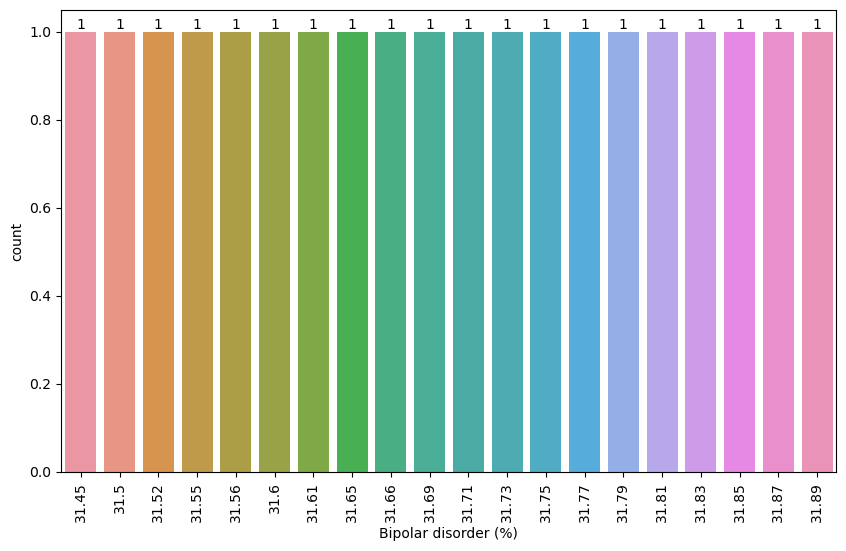

In [24]:
#Let's see the Bipolar disorder distribution in this dataset.
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Bipolar disorder (%)'].sort_values().drop_duplicates().head(20)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
age_range_plot = sns.countplot(data=data[data['Bipolar disorder (%)'].isin(distinct_data)], x='Bipolar disorder (%)')
age_range_plot.bar_label(age_range_plot.containers[0])
plt.xticks(rotation=90)

# Show the plot
plt.show()

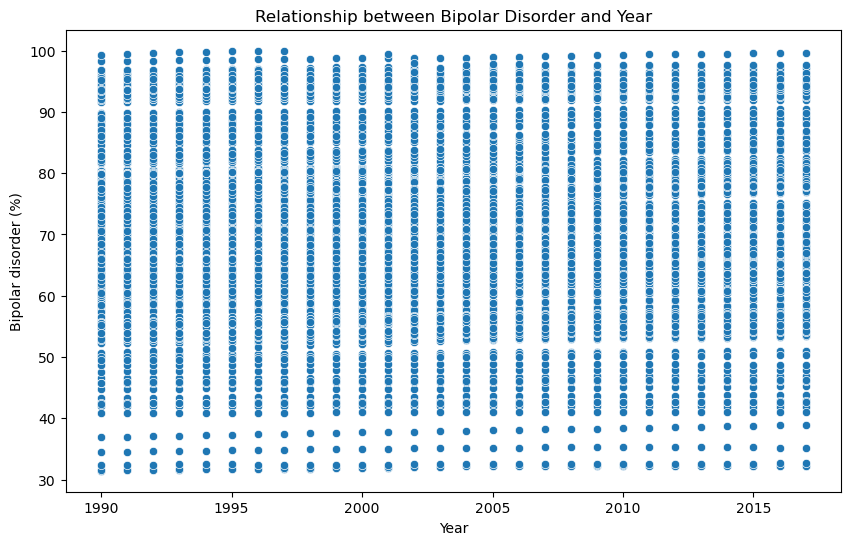

In [25]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Create a scatter plot to visualize the relationship between 'Year' and 'Bipolar disorder (%)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Year', y='Bipolar disorder (%)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Bipolar disorder (%)')
plt.title('Relationship between Bipolar Disorder and Year')

# Show the plot
plt.show()

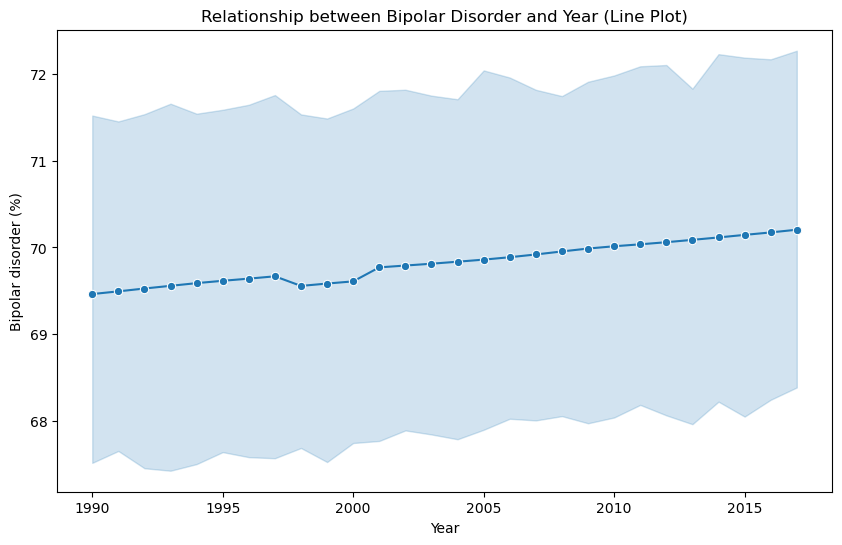

In [26]:
# Create a line plot to visualize the relationship between 'Year' and 'Bipolar disorder (%)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Bipolar disorder (%)', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Bipolar disorder (%)')
plt.title('Relationship between Bipolar Disorder and Year (Line Plot)')

# Show the plot
plt.show()

C:\Users\user\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

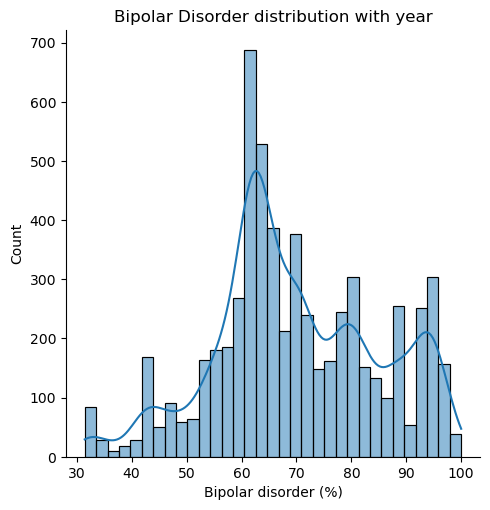

In [27]:
plt.figure(figsize=(10, 6));
sns.displot(data['Bipolar disorder (%)'], kde = 'Year');
plt.title('Bipolar Disorder distribution with year');

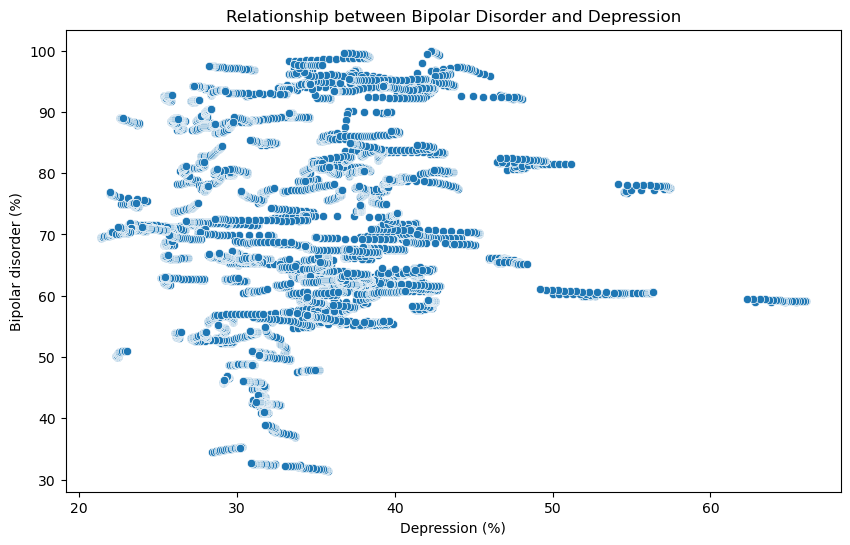

In [28]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')
data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce')

# Create a scatter plot to visualize the relationship between 'Depression' and 'Bipolar disorder (%)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Depression (%)', y='Bipolar disorder (%)')

# Add labels and title
plt.xlabel('Depression (%)')
plt.ylabel('Bipolar disorder (%)')
plt.title('Relationship between Bipolar Disorder and Depression')

# Show the plot
plt.show()

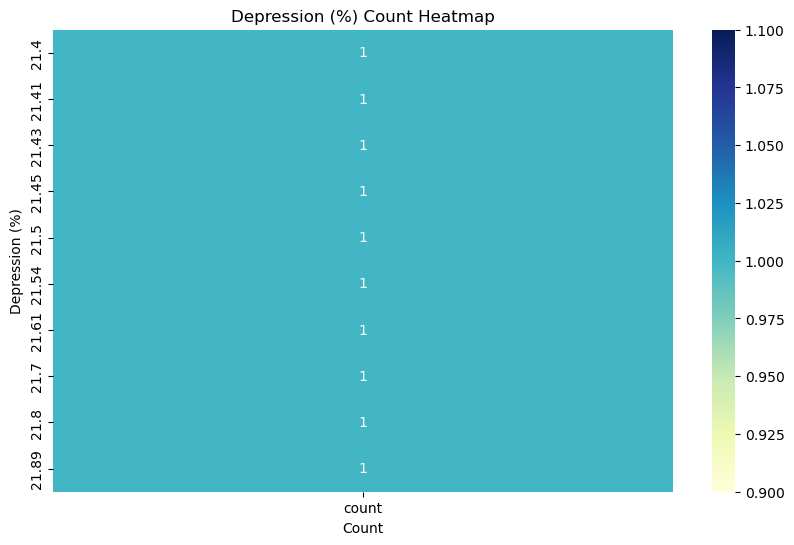

In [29]:
data = pd.DataFrame(data)
# Convert the 'Depression (%)' column to numeric
data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Depression (%)'].sort_values().drop_duplicates().head(10)

# Filter the DataFrame to include only the top 10 distinct values
filtered_df = data[data['Depression (%)'].isin(distinct_data)]

# Create a crosstab to convert the column to 2-dimensional format
heatmap_data = pd.crosstab(index=filtered_df['Depression (%)'], columns='count')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

# Show the plot
plt.title('Depression (%) Count Heatmap')
plt.xlabel('Count')
plt.ylabel('Depression (%)')
plt.show()

In [30]:
#Check Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6129 entries, 0 to 6467
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6129 non-null   int64  
 1   Bipolar disorder (%)       6129 non-null   float64
 2   Anxiety disorders (%)      6129 non-null   float64
 3   Drug use disorders (%)     6129 non-null   float64
 4   Depression (%)             6129 non-null   float64
 5   Alcohol use disorders (%)  6129 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 335.2 KB


In [31]:
#Let's check Standard deviation
data.describe()

,Year,Bipolar disorder (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,6129.000000,6129.000000,6129.000000,6129.000000,6129.000000,6129.000000
mean,2003.502203,69.820054,38.814118,8.365388,34.620439,1.568319
std,8.079749,15.010526,10.547031,4.378399,6.386639,0.871541
min,1990.000000,31.450000,20.230000,3.840000,21.400000,0.446940
25%,1996.000000,61.070000,31.650000,5.290000,29.730000,0.981464
50%,2004.000000,67.520000,34.850000,7.160000,34.660000,1.454326
75%,2011.000000,80.640000,46.050000,9.120000,38.590000,1.845972
max,2017.000000,99.990000,76.810000,34.520000,66.030000,5.474668


In [32]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

data['Year'] = MaxAbsScaler().fit_transform(data[['Year']])
data['Bipolar disorder (%)'] = StandardScaler().fit_transform(data[['Bipolar disorder (%)']])
data['Anxiety disorders (%)'] = StandardScaler().fit_transform(data[['Anxiety disorders (%)']])
data['Drug use disorders (%)'] = StandardScaler().fit_transform(data[['Drug use disorders (%)']])
data['Depression (%)'] = StandardScaler().fit_transform(data[['Depression (%)']])

data.describe()

,Year,Bipolar disorder (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,6129.000000,6.129000e+03,6.129000e+03,6.129000e+03,6.129000e+03,6129.000000
mean,0.993308,-9.274501e-17,-4.729996e-16,1.344803e-16,-7.767395e-16,1.568319
std,0.004006,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,0.871541
min,0.986614,-2.556418e+00,-1.762167e+00,-1.033656e+00,-2.070184e+00,0.446940
25%,0.989588,-5.829754e-01,-6.793099e-01,-7.024573e-01,-7.657922e-01,0.981464
50%,0.993555,-1.532419e-01,-3.758822e-01,-2.753257e-01,6.194860e-03,1.454326
75%,0.997025,7.208827e-01,6.861146e-01,1.723630e-01,6.215922e-01,1.845972
max,1.000000,2.010083e+00,3.602813e+00,5.974044e+00,4.918413e+00,5.474668


# Split the data to train and test

In [33]:
from sklearn.model_selection import train_test_split

#I wanna work on 'Bipolar Disorder' column.
X = data.drop(columns = ['Bipolar disorder (%)'])
y = data['Depression (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, y_train.shape)
print('-'*30)
print(X_test.shape, y_test.shape)
print('_'*30)

(4596, 5) (4596,)
------------------------------
(1533, 5) (1533,)
______________________________


In [34]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT

# Random Forest Classifier

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

bins = data['Bipolar disorder (%)']
labels = ['Low', 'Medium', 'High']


# Separate features (X) and target variable (y)
X = data.drop(columns=['Bipolar disorder (%)'])
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       357

    accuracy                           1.00      1226
   macro avg       1.00      1.00      1.00      1226
weighted avg       1.00      1.00      1.00      1226


Confusion Matrix:
[[869   0]
 [  0 357]]


# K nearest neighbor

In [36]:
steps_knn = [('Scaler', StandardScaler()),
             ('clf', KNN(n_neighbors = 5))]



clf_knn = Pipeline(steps=steps_knn)


clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
print('KNN accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_knn)*100)

KNN accuracy : 97.55301794453507


# Support vector Classifier

In [37]:
steps_svc = [('Scaler', StandardScaler()),
             ('clf', SVC())]



clf_svc = Pipeline(steps=steps_svc)


clf_svc.fit(X_train, y_train)

y_pred_svc = clf_svc.predict(X_test)
print('SVC accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_svc)*100)

SVC accuracy : 98.77650897226754


# Decision Tree

In [38]:
steps_dt = [('Scaler', StandardScaler()),
             ('clf', DT())]



clf_dt = Pipeline(steps=steps_dt)


clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
print('DT accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_dt)*100)

DT accuracy : 100.0


**LSTM Data Testing**

In [39]:

# Split the data into input features and target variable
X = data.iloc[:, :-1].values  # Input features
y = data.iloc[:, -1].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()


# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training set
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test set
X_test_encoded = encoder.transform(X_test)

# Check the data type of your input arrays

X_train = X_train.astype('float32')
y_train = y_train.astype('int32')

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))  # Change the activation function based on your problem

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change the loss function based on your problem

# Train the model
y_test = y_test.astype('int32')

model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))



Epoch 1/10


154/154 [==============================] - 26s 11ms/step - loss: -0.1318 - accuracy: 0.5364
Epoch 2/10
154/154 [==============================] - 1s 9ms/step - loss: -1.4347 - accuracy: 0.4842
Epoch 3/10
154/154 [==============================] - 1s 9ms/step - loss: -2.6260 - accuracy: 0.5323
Epoch 4/10
154/154 [==============================] - 1s 8ms/step - loss: -4.0157 - accuracy: 0.5419
Epoch 5/10
154/154 [==============================] - 2s 13ms/step - loss: -5.6508 - accuracy: 0.5435
Epoch 6/10
154/154 [==============================] - 4s 25ms/step - loss: -6.8718 - accuracy: 0.5488
Epoch 7/10
154/154 [==============================] - 2s 14ms/step - loss: -8.2774 - accuracy: 0.5605
Epoch 8/10
154/154 [==============================] - 2s 11ms/step - loss: -9.6950 - accuracy: 0.5684
Epoch 9/10
154/154 [==============================] - 2s 11ms/step - loss: -11.2566 - accuracy: 0.5713
Epoch 10/10
39/39 [==============================] - 2s 9ms/step - loss: -11.78

## LSTM **PREDICTION**

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
# Extract the features and target variable
X = data.drop('Bipolar disorder (%)', axis=1).values  # Input features
y = data['Bipolar disorder (%)'].values  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()


# Create an instance of the OneHotEncoder with 'ignore' for handle_unknown
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training set
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test set
X_test_encoded = encoder.transform(X_test)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Check for missing values (represented by a specific value, e.g., -1) in y_test
print(y_test.dtype)
print(np.unique(y_test))

# Train the model
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model

loss = model.evaluate(X_test, y_test)
print('Loss:', loss)

# Make predictions
predictions = model.predict(X_test)



float64
[-2.55641837 -2.54908958 -2.54042829 ...  1.97410562  1.97810314
  2.0000895 ]
Epoch 1/10
154/154 [==============================] - 8s 9ms/step - loss: 0.8130
Epoch 2/10
154/154 [==============================] - 1s 8ms/step - loss: 0.6531
Epoch 3/10
154/154 [==============================] - 1s 8ms/step - loss: 0.6490
Epoch 4/10
154/154 [==============================] - 1s 8ms/step - loss: 0.6418
Epoch 5/10
154/154 [==============================] - 1s 8ms/step - loss: 0.6399
Epoch 6/10
154/154 [==============================] - 1s 8ms/step - loss: 0.6340
Epoch 7/10
154/154 [==============================] - 1s 8ms/step - loss: 0.6349
Epoch 8/10
154/154 [==============================] - 1s 8ms/step - loss: 0.6381
Epoch 9/10
154/154 [==============================] - 1s 8ms/step - loss: 0.6295
Epoch 10/10
39/39 [==============================] - 1s 4ms/step - loss: 0.6809
Loss: 0.6809062361717224
39/39 [==============================] - 1s 4ms/step


In [41]:
model.save('disorder_model.h5')

C:\Users\user\anaconda4\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
from tensorflow.keras.models import load_model
loaded_model = load_model('disorder_model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
